In [ ]:
!pip install -qu langchain langchain-openai langchain-community langchain-core


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
import os
if not os.getenv("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = "secret"


In [ ]:
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = "secret"
os.environ["LANGSMITH_PROJECT"] = "langgraph-rag"

In [ ]:
pip install langchain_openai

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0.7)
response = llm.invoke("What is artificial intelligence?")
response

AIMessage(content='Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think, learn, and make decisions. These machines can perform tasks that typically require human cognitive functions such as understanding language, recognizing patterns, solving problems, and adapting to new information. AI encompasses a variety of techniques including machine learning, natural language processing, computer vision, and robotics, and it is used in applications ranging from virtual assistants and recommendation systems to autonomous vehicles and medical diagnosis.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 12, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14'

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage
message = [
    SystemMessage(content="You are a helpful AI Chatbot that explains complex topic simply"),
    HumanMessage(content="Explain about Deep Learning in 2 lines")
]
response = llm.invoke(message)
response

AIMessage(content='Deep Learning is a subset of machine learning that uses neural networks with many layers to automatically learn patterns from large amounts of data. It excels at tasks like image and speech recognition by mimicking how the human brain processes information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 31, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C33UvbYmcy50ZIIpqEwZY2Qibl5VZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--e75015f1-f2e7-43cd-a523-5f242165d0e3-0', usage_metadata={'input_tokens': 31, 'output_tokens': 44, 'total_tokens': 75, 'input_token_details': {'audio': 0, 'cache_read': 0

In [ ]:
pip install -qu duckduckgo-search


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
!pip install langchain_community
!pip install -U duckduckgo-search
from langchain_core.tools import tool
from langchain_community.tools import DuckDuckGoSearchRun

In [ ]:
@tool #langchain automatically inspects the function (since langchain has a specific format for tools that the LLM understands)
def calculator(expression: str) -> str:
    """Calculate mathematical expressions. Use this for any math calculations."""
    try:
        result = eval(expression)
        return f"The result of {expression} is {result}"
    except Exception as e:
        return f"Error calculating {expression}: {str(e)}"

search_tool = DuckDuckGoSearchRun() #acess the information concurrently from the web (executes the search across the web)

tools = [calculator, search_tool]
llm_with_tools = llm.bind_tools(tools)
response = llm_with_tools.invoke("What's 25 * 4 + 17?")
print(response.content) #no response

In [ ]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_BPbG4HqINAwTfDcMu6DHysvk', 'function': {'arguments': '{"expression":"25 * 4 + 17"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 107, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-C33VGiB2lYK4xfzRz2U2pI5ZCgzsw', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--454b6a0b-56b6-464a-85b9-2762db1ebb29-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '25 * 4 + 17'}, 'id': 'call_BPbG4HqINAwTfDcMu6DHysvk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 107, 'output_tokens': 20, 'total_tokens': 127, 'inp

In [ ]:
tool_map = {
    'calculator': calculator,
    'duckduckgo_search': search_tool,
}

def handle_tool_calls(response, tool_map):
    if not getattr(response, 'tool_calls', None):
        return
    print(f"Tool calls requested: {len(response.tool_calls)}")
    for tool_call in response.tool_calls:
        tool_name = tool_call['name']
        args = tool_call['args']
        print(f"Tool: {tool_name}")
        print(f"Args: {args}")

        tool = tool_map.get(tool_name)
        if tool:
            result = tool.invoke(args)
            preview = result[:200] + '...' if isinstance(result, str) and len(result) > 200 else result
            print(f"Tool result: {preview}") #print first 200 chars for long response(e.g search)

In [ ]:
def test_llm_tool(query):
    print(f"Query: {query}")
    response = llm_with_tools.invoke(query) #llm.bind(calculator and search tools)
    print(f"Response: {getattr(response, 'content', response)}")
    handle_tool_calls(response, tool_map)
    print('\n\n')

test_llm_tool("What's 25 * 4 + 17?")
test_llm_tool("Search for recent news about artificial intelligence")

Query: What's 25 * 4 + 17?
Response: 
Tool calls requested: 1
Tool: calculator
Args: {'expression': '25 * 4 + 17'}
Tool result: The result of 25 * 4 + 17 is 117



Query: Search for recent news about artificial intelligence
Response: 
Tool calls requested: 1
Tool: duckduckgo_search
Args: {'query': 'recent news about artificial intelligence'}
Tool result: windows 11设置不显示最近打开文件的方法： 1、在开始界面点击设置 2、点击个性化 3、点击开始 4、点击关闭显示最近打开的 ... Oct 17, 2022 · recent文件查看 1/3 打开运行窗口 进入Windows页面后右键点击win图标，在菜单栏中点击【运行】，也可使用win+R键打开运行。 编辑于2022-04-10，内容仅供参考并受版权保护 对于很多已经把电脑Window...





/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


In [ ]:
#use of langchain expression language to invoke them directly (from duckduckgo search)
search_tool.invoke("Search for recent news about artificial intelligence")

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


'2 days ago · AI News reports on the latest artificial intelligence news and insights. Explore industry trends from the frontline of AI. 1 day ago · Get the latest AI news, live updates, and expert insights on artificial intelligence, machine learning, deep learning, and more at xix.ai. Handpicked daily for developers, … 3 days ago · All the latest breaking news on Artificial Intelligence. Browse Newsweek archives of photos, videos and articles on Artificial Intelligence. 6 days ago · Artificial intelligence has ushered in an era of what insiders in the nation’s innovation capital call “hard tech.” The Rationalists, a community focused on the risks of artificial … Jun 25, 2025 · Artificial Intelligence News. Everything on AI including futuristic robots with artificial intelligence, computer models of human intelligence and more.'

Structured Output LLM

In [ ]:
from pydantic import BaseModel, Field
from typing import List, Optional

In [ ]:
class PersonInfo(BaseModel):
  name: str = Field(description="Full name of the person")
  age: Optional[int] = Field(description="Age of the person")
  occupation: str = Field(description="Person's job or profession")
  skills : List[str] = Field(description="List of skills or abilities")

structured_llm = llm.with_structured_output(PersonInfo)
print("structured output test: ")
person_prompt = """
Extract information about this person:
'John Smith is a 35-year old software engineer who works at Google.
He specializes in machine larning, Python programming and cloud architecture.
John has been working in the tech for over 10 years and is passionate about AI research.

"""
person_result = structured_llm.invoke(person_prompt)
print(f"Name: {person_result.name}")
print(f"Age: {person_result.age}")
print(f"Occupation: {person_result.occupation}")
print(f"Skills: {', '.join(person_result.skills)}")


structured output test: 
Name: John Smith
Age: 35
Occupation: software engineer
Skills: machine learning, Python programming, cloud architecture, AI research


#Basic langgrapah chatbot


In [ ]:
!pip install -qU langgraph

In [ ]:
from typing import Annotated, TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  ''' State for our Chatbot  - this holds the conversation history '''
  #the add_message func handles appending new messages to the conversation
  messages: Annotated[list[BaseMessage], add_messages] #when the state is updated then the add_message should be appended insetead of overwriting to the array

llm = ChatOpenAI(model='gpt-4.1-mini', temperature=0.7)

In [ ]:
def chatbot_node(state: State) -> State:
  ''' the main chatbot node that processes messages and generates responses '''
  print(f"processing {len(state['messages'])} messages")

  #get the response from the llm
  response = llm.invoke(state['messages'])

  #return the updated state with the new response
  return {"messages": [response]}

print("Chatbot node function created")


Chatbot node function created


#build the graph

In [ ]:
from langgraph.graph import StateGraph, START, END

graph structure created
graph compiled successfully


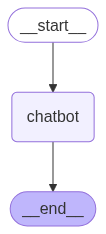

In [ ]:
graph_builder = StateGraph(State)

#add the chatbot node to the graph
graph_builder.add_node("chatbot", chatbot_node)

#define the flow: start->chatbot->end
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

#compile the graph
graph = graph_builder.compile()

print("graph structure created")
print("graph compiled successfully")

#visualize the graph

img = graph.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
  f.write(img)

from IPython.display import Image, display
display(Image("graph.png"))

#Test the chatbot

In [ ]:
def test_chatbot(message: str):
  '''helper functoin to test our chatbot'''
  print(f"\n user: {message}")

  #create the initial state with the user message
  initial_state = {"messages": [HumanMessage(content=message)]}

  #run the graph
  result = graph.invoke(initial_state)

  #get the ai response
  ai_response = result['messages'][-1].content
  print(f"Assistent: {ai_response}")

  return result

#test with simple message
test_cases = [
    "hello, my name Narmadha?",
    "Do you remember my name"
]

for test_message in test_cases:
  test_chatbot(test_message)


 user: hello, my name Narmadha?
processing 1 messages
Assistent: Hello, Narmadha! How can I assist you today?

 user: Do you remember my name
processing 1 messages
Assistent: I don’t have a record of your name from our previous messages. What should I call you?


#add memory to the chatbot

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
memory = MemorySaver()

#compile the graph with memory
graph_with_memory = graph_builder.compile(checkpointer=memory)

print("memory added to chatbot")

def chat_with_memory(message: str, thread_id: str):
  '''chat function with memory '''
  print(f"\n user: {message}")

  #configuration for the thread
  config = {'configurable': {'thread_id': thread_id}}

  #create the initial state with the user message to conversation
  initial_state = {"messages": [HumanMessage(content=message)]}

  #run the graph with memory
  result = graph_with_memory.invoke(initial_state, config)

  #get the ai response
  ai_response = result['messages'][-1].content
  print(f"Assistent: {ai_response}")

  #test conversation with memory
print('\n testing convo with memo')

chat_with_memory("Hi, my name is Narmadha", thread_id="thread-1")
chat_with_memory("What's my name?", thread_id="thread-1")
chat_with_memory("Do you remember my name?", thread_id="thread-1")

memory added to chatbot

 testing convo with memo

 user: Hi, my name is Narmadha
processing 1 messages
Assistent: Hello Narmadha! How can I assist you today?

 user: What's my name?
processing 3 messages
Assistent: Your name is Narmadha. How can I help you further?

 user: Do you remember my name?
processing 5 messages
Assistent: Yes, I remember your name is Narmadha. How can I assist you today?


#3. langgraph agent with tools

In [ ]:
class AgentState(TypedDict):
  '''state for our two-node agent'''
  messages: Annotated[list[BaseMessage], add_messages]

#initialize llm with tools
llm = ChatOpenAI(model='gpt-4.1-mini', temperature =0.7)
llm_with_tools=llm.bind_tools(tools)

creating chatbot node

In [ ]:
def chatbot_node(state: AgentState) -> AgentState:
  '''the chatbot node that decideds whethr to use tools or provide direct responses'''
  messages = state["messages"]

  #add system prompt
  system_message = '''you are a helpful ai assistent. You have access to web search and calculator tools.

  Use the web_seach tool when:
  - asked about current events, news, or recent information
  - need to find specific facts or data
  - asked about real-time informaion(weather, stock prices, etc.)

  use the calculator tool when:
  - asked to perform mathematical calculations
  - need to solve math problems

  for general knowledge questions that don't require real-time data, answer directly
  be helpful and conversational in your response. '''

  #prepare messages woth system prompts
  all_messages = [{'role':"system", "content": system_message}] + messages

  #get response from llm
  response = llm_with_tools.invoke(all_messages)

  return {'messages':[response]}

print('chatbot node created')

chatbot node created


#creating tool node and routing logic

In [ ]:
from langgraph.prebuilt import ToolNode
from typing import Literal

In [ ]:
tools

[StructuredTool(name='calculator', description='Calculate mathematical expressions. Use this for any math calculations.', args_schema=<class 'langchain_core.utils.pydantic.calculator'>, func=<function calculator at 0x7b98b257f420>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text'))]

In [ ]:

tool_node = ToolNode(tools)

print("Tool node created")


def should_continue(state: AgentState) -> Literal["tools", "end"]:
    """
    Determine whether to continue to tools or end the conversation
    """
    messages = state["messages"]
    last_message = messages[-1]

    # If the last message has tool calls, go to tools
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    # Otherwise, end the conversation
    else:
        return "end"

print("Routing logic created")

Tool node created
Routing logic created


#building graph



In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

Graph compiled with memory



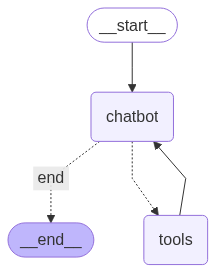

In [ ]:

workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("tools", tool_node)

# Set entry point
workflow.add_edge(START, "chatbot")

# Add conditional edges
workflow.add_conditional_edges(
    "chatbot",
    should_continue,
    {
        "tools": "tools",
        "end": END,
    },
)

# After using tools, go back to chatbot
workflow.add_edge("tools", "chatbot")

# Compile the graph
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

print("Graph compiled with memory\n")

# ============================================================================
# VISUALIZE THE GRAPH
# ============================================================================
img = app.get_graph(xray=True).draw_mermaid_png()
with open("graph.png", "wb") as f:
    f.write(img)

from IPython.display import Image, display
display(Image("graph.png"))

#testing agent

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, ToolMessage
def chat_with_agent(message: str, thread_id: str):
    """Chat with the two-node agent"""
    print(f"\n👤 User: {message}")

    config = {"configurable": {"thread_id": thread_id}}

    # Stream the response to see the process
    messages_to_process = {"messages": [HumanMessage(content=message)]}

    for event in app.stream(messages_to_process, config):
        for value in event.values():
            if "messages" in value:
                last_message = value["messages"][-1]
                if hasattr(last_message, 'content') and last_message.content:
                    if isinstance(last_message, AIMessage):
                        print(f" Assistant: {last_message.content}")
                    elif isinstance(last_message, ToolMessage):
                        print(f" Tool Result: {last_message.content[:100]}...")

while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        break
    chat_with_agent(user_input, thread_id="thread-2")


#question
#i am narmadha
#do you remember my name
#what's 15%of 240?
#what's the latest news about ai?
#follow-up: can you tell me more about that?

User: i am narmadha

👤 User: i am narmadha
🤖 Assistant: Got it, Narmadha! How can I assist you today?
User: do you remember my name

👤 User: do you remember my name
🤖 Assistant: Yes, you mentioned your name is Narmadha. How can I help you today, Narmadha?
User: what's 15% of 240

👤 User: what's 15% of 240
🤖 Assistant: 15% of 240 is 36. If you need help with anything else, feel free to ask!
User: what's the latest news about artificial intellegence?

👤 User: what's the latest news about artificial intellegence?


/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b98b0e74050>


🔧 Tool Result: Breaking news from Hong Kong, China and Asia including geopolitics, diplomacy, economy, technology, ...
🤖 Assistant: I found some search results, but they do not seem to include the latest news about artificial intelligence specifically. Let me try again to find the most recent updates on artificial intelligence.
🔧 Tool Result: Breaking news from Hong Kong, China and Asia including geopolitics, diplomacy, economy, technology, ...


/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7b98b0f33850>


🤖 Assistant: It seems the search results are not showing the latest specific news about artificial intelligence. If you want, I can provide a summary of recent trends and developments in AI based on what is generally known up to now. Would you like me to do that?
User: can you tell me more about that?

👤 User: can you tell me more about that?
🤖 Assistant: Certainly! Here’s a summary of some recent trends and developments in artificial intelligence as of 2024:

1. **Generative AI Advances**: Models like GPT-4 and other large language models have continued to improve, enabling more natural and creative text generation. These models are being integrated into various applications including chatbots, content creation tools, and programming assistants.

2. **AI in Healthcare**: AI is increasingly used for diagnostics, drug discovery, and personalized medicine. Algorithms help analyze medical images, predict patient outcomes, and assist in clinical decision-making.

3. **Ethics and Regulation